***
# from ztfquery import fritz
***

**2.2: Storing and retrieving data.**

This quick tutorial will focus on how `ztfquery` enables conviniant storing / retreiving of any fritz products.

#### _WARNING_

Make sure you have set you `$ZTFDATA` global variable (see Tutorial 0)

***
# `.store()` methods

Each `Frits{Object}` have a `.store()` method that enables you to store the data locally following the `ztfquery` logic. 

The data will be stored in subdirectories of `$ZTFDATA/fritz` such that:

- `FritzPhotometry.store()` will store the lightcurves as: `$ZTFDATA/fritz/lightcurve/fritz_lightcurve_{targetname}.csv`
- `FritzAlerts.store()` will store the alerts as: `$ZTFDATA/fritz/alerts/fritz_alerts_{targetname}.csv`
- `FritzSource.store()` will store the alerts as: `$ZTFDATA/fritz/source/fritz_source_{targetname}.json`

You have choice on the stored extension, but I would suggest leaving the default one.


The `FritzSpectrum` are slightly more complicated as you may have several spectra associated to one target. Hence they are stored as:
- `FritzSpectrum.store()` will store the spectra as: `$ZTFDATA/fritz/spectra/{targetname}/fritz_spectrum_{instrument}_{keyfile}_{targetname}.ascii`

where `{keyfile}` is a unique identifier of the spectrum (basically, it's name)


**Remark:** All the `download_{object}()` (See 2.1) have a store option (`store=False` by default). So for instance to download and store a lightcurve, simply do: `lc = download_lightcurve(targetname, store=True)`

### Example:

In [20]:
from ztfquery import fritz
source = fritz.download_source("ZTF20acrzwvx", get_object=True)

In [21]:
source.store()

Let's check that the source is there.

In [22]:
import os
os.listdir(os.path.join(fritz.FRITZSOURCE,"source"))

['fritz_source_ZTF20acrzwvx.json']

In [23]:
source.fritzdict

{'score': 0.9999709725379944,
 'dec': -15.9420832,
 'altdata': None,
 'origin': 'Kowalski',
 'id': 'ZTF20acrzwvx',
 'dist_nearest_source': None,
 'ra_dis': 81.1933712,
 'internal_key': 'c3eeef3e-c840-418a-9d13-44634de89e66',
 'mag_nearest_source': None,
 'detect_photometry_count': 2,
 'dec_dis': -15.9420658,
 'e_mag_nearest_source': None,
 'ra_err': None,
 'transient': True,
 'created_at': '2020-11-20T23:06:14.449344',
 'dec_err': None,
 'modified': '2021-03-20T08:24:50.341767',
 'varstar': False,
 'offset': 0.0,
 'ra': 81.193414,
 'is_roid': False,
 'redshift': 0.009954,
 'redshift_history': [{'value': 0.009954,
   'set_at_utc': '2020-11-23T12:48:06.101057',
   'set_by_user_id': 11}],
 'thumbnails': [{'type': 'sub',
   'created_at': '2020-11-20T23:06:15.589724',
   'origin': None,
   'file_uri': '/skyportal/static/thumbnails/ZTF20acrzwvx_sub.png',
   'modified': '2020-11-20T23:06:15.589724',
   'id': 130016,
   'obj_id': 'ZTF20acrzwvx',
   'public_url': '/static/thumbnails/ZTF20acrzwv

Let's reload it.

In [24]:
source_loaded = fritz.FritzSource.read_json(os.path.join(fritz.FRITZSOURCE,"source","fritz_source_ZTF20acrzwvx.json"))

In [25]:
source_loaded.fritzdict

{'score': 0.9999709725379944,
 'dec': -15.9420832,
 'altdata': None,
 'origin': 'Kowalski',
 'id': 'ZTF20acrzwvx',
 'dist_nearest_source': None,
 'ra_dis': 81.1933712,
 'internal_key': 'c3eeef3e-c840-418a-9d13-44634de89e66',
 'mag_nearest_source': None,
 'detect_photometry_count': 2,
 'dec_dis': -15.9420658,
 'e_mag_nearest_source': None,
 'ra_err': None,
 'transient': True,
 'created_at': '2020-11-20T23:06:14.449344',
 'dec_err': None,
 'modified': '2021-03-20T08:24:50.341767',
 'varstar': False,
 'offset': 0.0,
 'ra': 81.193414,
 'is_roid': False,
 'redshift': 0.009954,
 'redshift_history': [{'value': 0.009954,
   'set_at_utc': '2020-11-23T12:48:06.101057',
   'set_by_user_id': 11}],
 'thumbnails': [{'type': 'sub',
   'created_at': '2020-11-20T23:06:15.589724',
   'origin': None,
   'file_uri': '/skyportal/static/thumbnails/ZTF20acrzwvx_sub.png',
   'modified': '2020-11-20T23:06:15.589724',
   'id': 130016,
   'obj_id': 'ZTF20acrzwvx',
   'public_url': '/static/thumbnails/ZTF20acrzwv

**Remark that it is pretty annoying to have to manually reset the full path**

***
# The `.from_name()` class method 

We presented in 2.1 that the `Fritz{Object}.from_name()` did very similar things than the `download_{object}(get_object=True)`.

Well it's not quite true, `Fritz{Object}.from_name()` is actually smarter than that. What is does is that it first checks if you have already stored the object (using `store()`) as it know how to rebuild the full path (check `._build_filename_()`). If so, it loads it from you computer, if not it downloads it from fritz. 

**Remark that the `force_dl=True` option enables you to download from fritz even if you have it locally**

## Example

First from download it from fritz and store it. (used force_dl it case you already did it)

In [26]:
%time lc = fritz.FritzPhotometry.from_name("ZTF20acrzwvx", force_dl=True)

CPU times: user 91.9 ms, sys: 29.6 ms, total: 122 ms
Wall time: 2.37 s


In [27]:
lc.store()

<IPython.core.display.Javascript object>


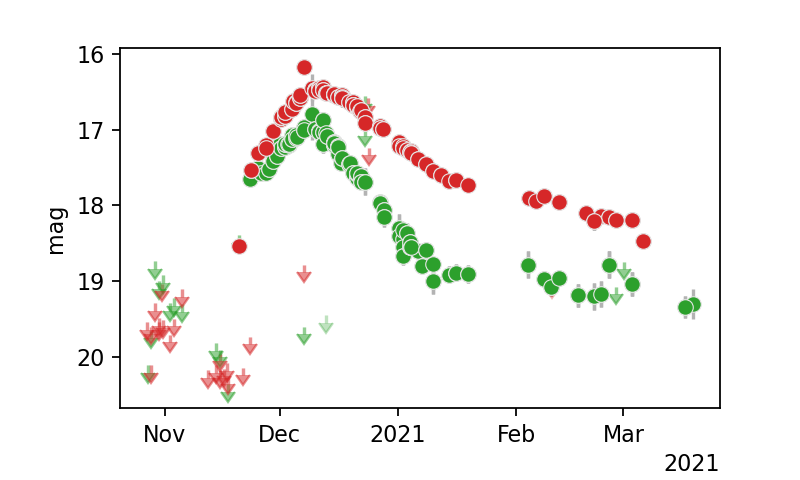

In [28]:
%matplotlib notebook
_ = lc.show()

Then take it locally

In [29]:
%time lc_loaded = fritz.FritzPhotometry.from_name("ZTF20acrzwvx")

CPU times: user 4.84 ms, sys: 2.13 ms, total: 6.97 ms
Wall time: 5.9 ms


<IPython.core.display.Javascript object>


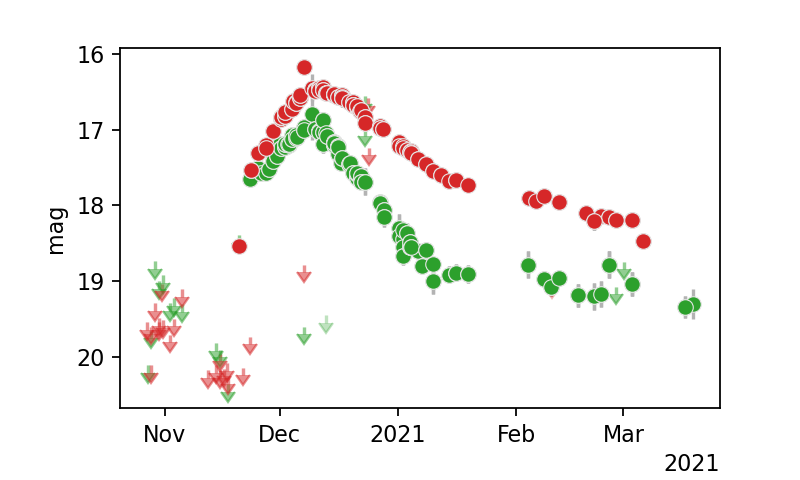

In [30]:
_=lc_loaded.show()

***
# Credits:

Tutorial made by M. Rigault (m.rigault@ipnl.in2p3.fr)

If you have used ztfquery in any point of you research work, please cite https://ui.adsabs.harvard.edu/abs/2018zndo...1345222R/abstract. 

**Citations are important as they enable to justify the time spent to build code like this one to funding agencies.**


### Acknowledgements:

*The ztfquery code was funded by the European Research Council (ERC) under the European Union's Horizon 2020 research and innovation programme (grant agreement n°759194 - USNAC, PI: Rigault).*
***